In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 0. 运动员表
## 0.1 去除奖项

In [3]:
# t
# 读取数据
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# 删除重复的行
athletes = athletes.drop_duplicates()

# 处理缺失值
athletes = athletes.dropna()

# 转换数据类型
athletes['Year'] = athletes['Year'].astype(int)
athletes['Medal'] = athletes['Medal'].astype(str)

# 删除文字中的空格
# 去除列中所有字符串数据前后的空格
athletes['NOC'] = athletes['NOC'].str.strip()  # 去除前后的空格
athletes['Sport'] = athletes['Sport'].str.strip()
athletes['Name'] = athletes['Name'].str.strip()

# 删除列中所有字符串数据中的空格（包括内部的空格）
athletes['NOC'] = athletes['NOC'].str.replace(' ', '', regex=False)
athletes['Sport'] = athletes['Sport'].str.replace(' ', '', regex=False)
athletes['Name'] = athletes['Name'].str.replace(' ', '', regex=False)

# 打印清洗后的数据
athletes


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,ADijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,ALamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,GunnarAaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia(-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,SeforaAda,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,EmanuelaLiuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [4]:
athletes_with_medal = athletes[athletes['Medal'] != 'No medal']
athletes_with_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...
252551,QuincyWilson,M,United States,USA,2024,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,vanAnne,F,Netherlands,NED,2024,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [5]:
athletes_with_gold_medal = athletes[athletes['Medal'] == 'Gold']
athletes_with_gold_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
18,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
22,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
33,RagnhildAamodt,F,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
...,...,...,...,...,...,...,...,...,...
252244,JanjaGarnbret,F,Slovenia,SLO,2024,Paris,SportClimbing,Women's Boulder & Lead,Gold
252475,CroixBethune,F,United States,USA,2024,Paris,Football,Women,Gold
252544,AaliyahButler,F,United States,USA,2024,Paris,Athletics,Women's 4 x 400m Relay,Gold
252550,QuincyWilson,M,United States,USA,2024,Paris,Athletics,Men's 4 x 400m Relay,Gold


## 0.2 离散点

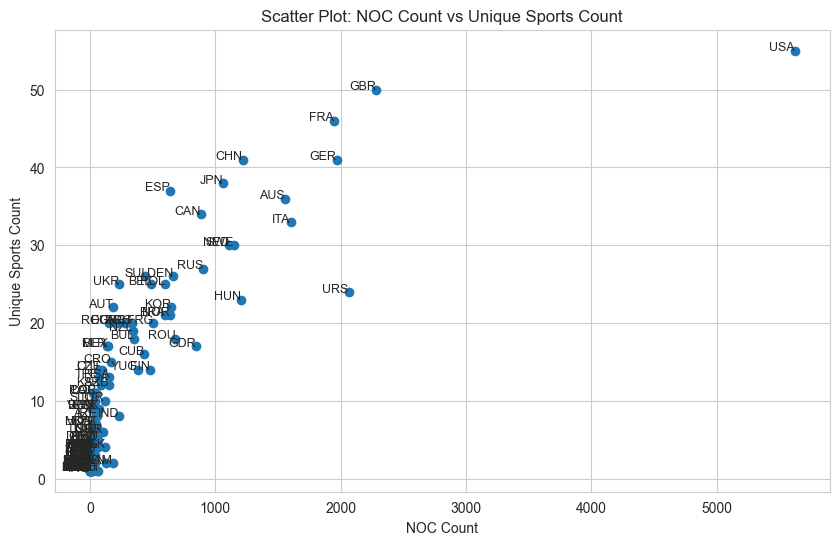

In [6]:
# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_point = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_point.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_medal, sport_counts_medal_point)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts_medal_point.index, noc_sport_counts_medal, sport_counts_medal_point):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


# 0.3 归一化排名和k-means

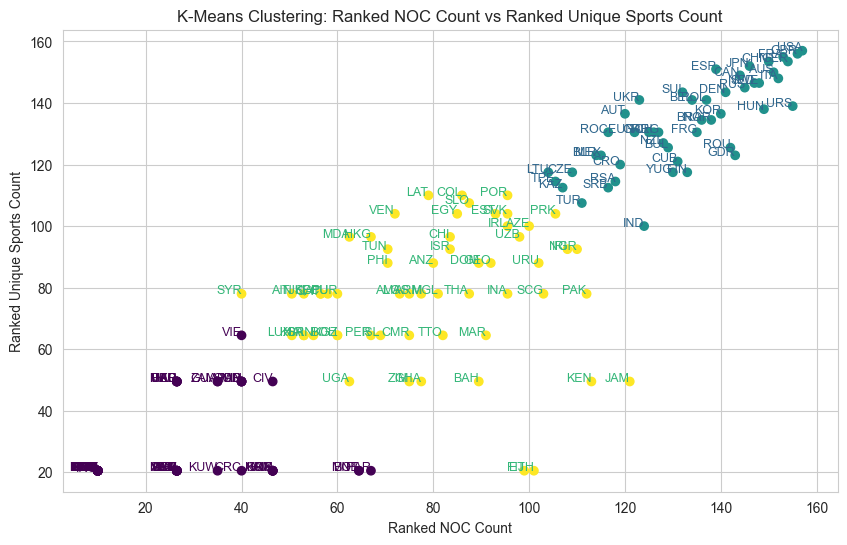

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_kmeans = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts_medal = noc_counts_medal.loc[sport_counts_medal_kmeans.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts_medal.rank()
sport_counts_rank = sport_counts_medal_kmeans.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_point.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


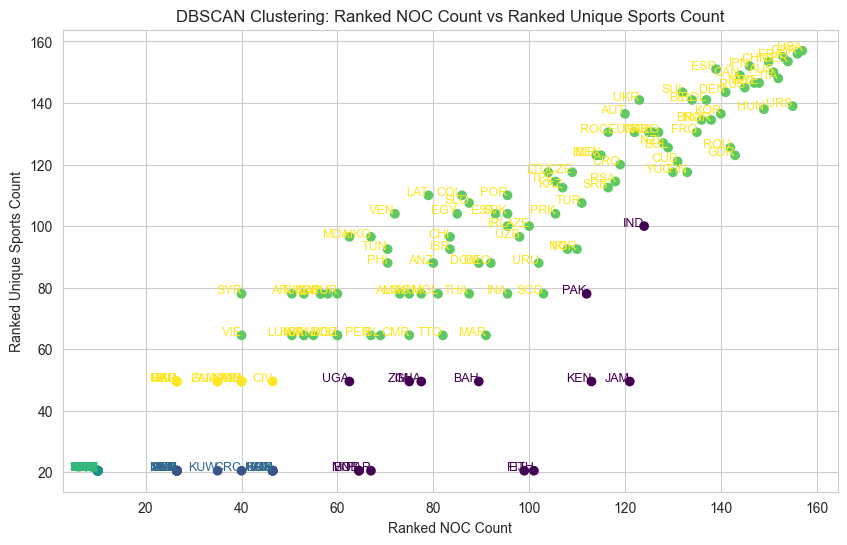

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts_medal = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts_medal_dbscan = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts_medal.loc[sport_counts_medal_dbscan.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts_medal_dbscan.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts_medal_dbscan.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


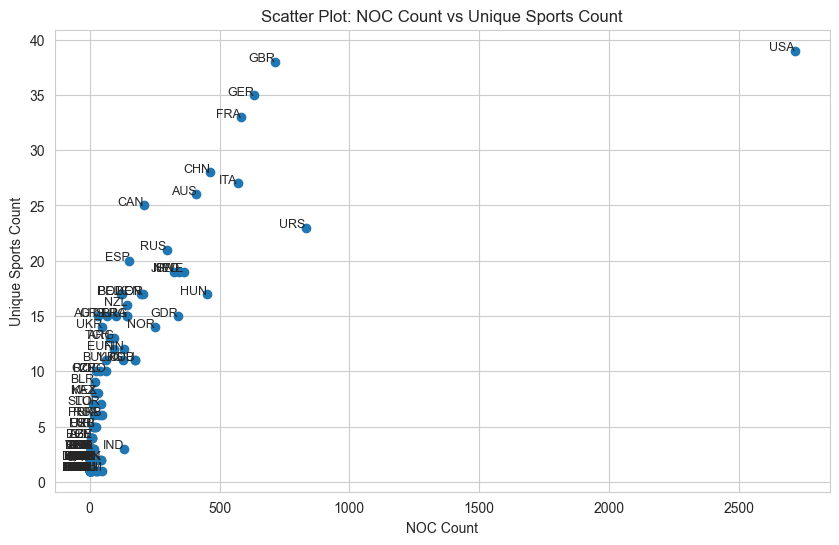

In [9]:
# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts, sport_counts)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts.index, noc_sport_counts, sport_counts):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


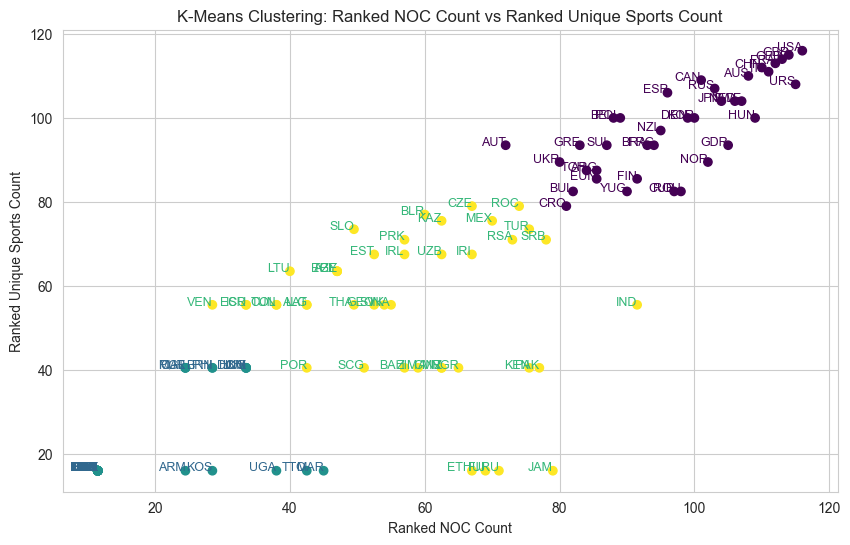

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


In [11]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # 1. 计算每个 NOC 值的数量
# noc_counts = athletes_with_gold_medal['NOC'].value_counts()
# 
# # 2. 计算每个 NOC 对应的不同 Sport 数量
# sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()
# 
# # 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
# noc_sport_counts = noc_counts.loc[sport_counts.index]
# 
# # 计算排名
# noc_sport_counts_rank = noc_sport_counts.rank()
# sport_counts_rank = sport_counts.rank()
# 
# # 将排名数据合并成一个数据集进行 DBSCAN 聚类
# X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])
# 
# # 4. 使用 DBSCAN 聚类
# dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
# labels = dbscan.fit_predict(X)
# 
# # 5. 绘制散点图并使用不同颜色标记聚类结果
# plt.figure(figsize=(10, 6))
# plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')
# 
# # 在每个点上添加 NOC 标签
# for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
#     plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色
# 
# # 添加标签和标题
# plt.xlabel('Ranked NOC Count')
# plt.ylabel('Ranked Unique Sports Count')
# plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')
# 
# # 显示图表
# plt.show()


# 1.数据预处理分析
# 1.1 东道主分析

In [12]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
hosts

,Year,Host,NOC
0,1896,"Athens, Greece",GRE
1,1900,"Paris, France",FRA
2,1904,"St. Louis, United States",USA
3,1908,"London, United Kingdom",GBR
4,1912,"Stockholm, Sweden",SWE
5,1916,Cancelled (WWI – Berlin had been awarded),NaN
6,1920,"Antwerp, Belgium",BEL
7,1924,"Paris, France",FRA
8,1928,"Amsterdam, Netherlands",NED
9,1932,"Los Angeles, United States",USA


    Year                                         Host  NOC
5   1916    Cancelled (WWI – Berlin had been awarded)  NaN
10  1936                              Berlin, Germany  NaN
11  1940    Cancelled (WWII – Tokyo had been awarded)  NaN
12  1944   Cancelled (WWII – London had been awarded)  NaN
21  1980                         Moscow, Soviet Union  NaN
33  2028                   Los Angeles, United States  NaN
34  2032                          Brisbane, Australia  NaN


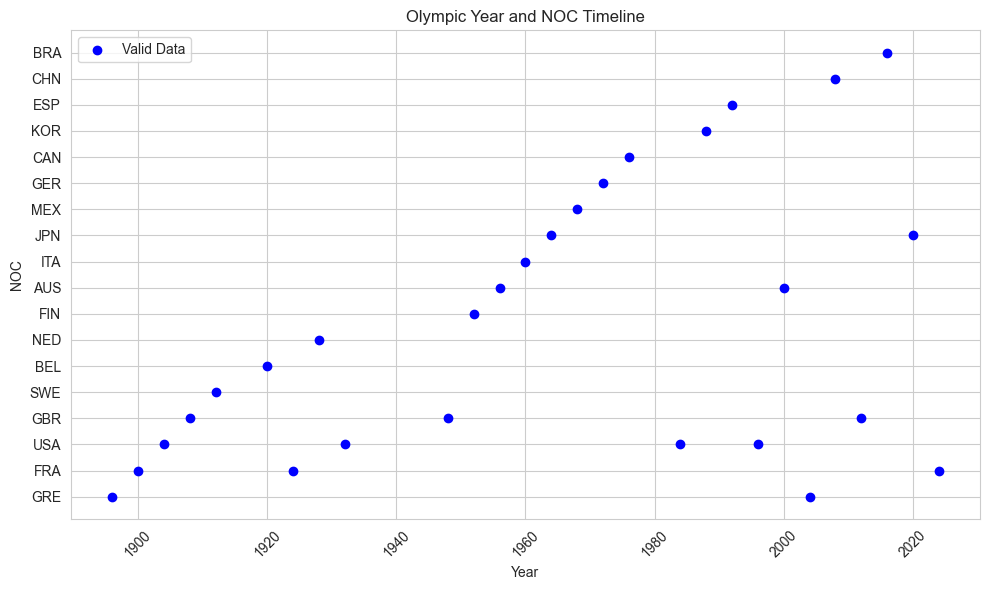

In [13]:
# 创建一个图形
plt.figure(figsize=(10, 6))

# 绘制正常的数据点
valid_data = hosts.dropna()  # 去掉NaN值的数据
plt.scatter(valid_data['Year'], valid_data['NOC'], color='b', marker='o', label='Valid Data')

# 找到 'Year' 或 'NOC' 列有NaN的行
invalid_data = hosts[hosts['Year'].isna() | hosts['NOC'].isna()]  # 确保检查 'Year' 或 'NOC' 中的NaN

# 输出NaN数据
print(invalid_data)

# 设置图标题和标签
plt.title('Olympic Year and NOC Timeline')
plt.xlabel('Year')
plt.ylabel('NOC')
plt.xticks(rotation=45)
plt.tight_layout()

# 添加图例
plt.legend()

# 显示图形
plt.show()

# 1.2 奖牌映射

In [14]:
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,NaN,11,7,2,20,1896
1,2,Greece,NaN,10,18,19,47,1896
2,3,Germany,NaN,6,5,2,13,1896
3,4,France,NaN,5,4,2,11,1896
4,5,Great Britain,NaN,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,NaN,0,0,1,1,2024
1431,84,Refugee Olympic Team,NaN,0,0,1,1,2024
1432,84,Singapore,NaN,0,0,1,1,2024
1433,84,Slovakia,NaN,0,0,1,1,2024


In [15]:
# 统计每个国家的出现次数
country_counts = medal_counts['Country'].value_counts()
country_counts

Country
Great Britain           30
France                  30
Denmark                 29
United States           29
Canada                  28
                        ..
Saint Lucia              1
Dominica                 1
Albania                  1
Cabo Verde               1
Refugee Olympic Team     1
Name: count, Length: 162, dtype: int64

## NOC 键值对和输出的csv

In [16]:
country_to_noc_df = pd.read_csv('2025_Problem_C_Data/NOC_dict_alter.csv')
country_to_noc = dict(zip(country_to_noc_df['Country'], country_to_noc_df['NOC']))
country_to_noc_df

,Country,Unnamed: 1,Unnamed: 2,NOC
0,Afghanistan,AFG,NaN,AFG
1,Albania,ALB,NaN,ALB
2,Algeria,ALG,NaN,ALG
3,Netherlands Antilles,ANT,AHO,AHO
4,United Arab Emirates,ARE,UAE,UAE
...,...,...,...,...
156,Vietnam,VNM,VIE,VIE
157,FR Yugoslavia,YUG,NaN,YUG
158,Yugoslavia,YUG,NaN,YUG
159,Zambia,ZAM,NaN,ZAM


In [17]:
# 使用 .map() 方法将 'Country' 列的值转换为 'NOC'
medal_counts['NOC'] = medal_counts['Country'].map(country_to_noc)
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,USA,11,7,2,20,1896
1,2,Greece,GRE,10,18,19,47,1896
2,3,Germany,GER,6,5,2,13,1896
3,4,France,FRA,5,4,2,11,1896
4,5,Great Britain,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,QAT,0,0,1,1,2024
1431,84,Refugee Olympic Team,ROT,0,0,1,1,2024
1432,84,Singapore,SGP,0,0,1,1,2024
1433,84,Slovakia,SVK,0,0,1,1,2024


# 1.3 项目表

In [18]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Artistic Swimming,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Diving,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Marathon Swimming,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Swimming,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Water Polo,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Wrestling,Freestyle,WRF,UWW,0,0,7,0,5,0,...,10,10,10.0,8.0,11.0,11.0,11.0,12.0,12.0,12.0
59,Wrestling,Greco-Roman,WRG,UWW,1,0,0,4,4,5,...,10,10,10.0,8.0,7.0,7.0,7.0,6.0,6.0,6.0
60,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
61,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## 1.4 统计奖牌数

<Figure size 1000x600 with 0 Axes>

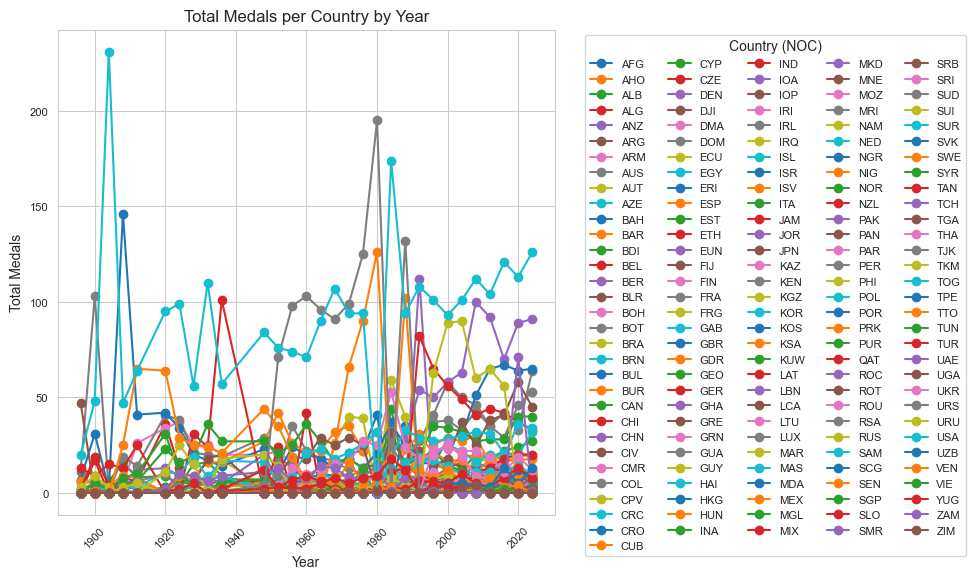

In [19]:
# Group by Year and Country, summing total medals
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)
medals_by_year_gold = medal_counts.groupby(['Year', 'NOC'])['Gold'].sum().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


- 参赛人数统计

<Figure size 1000x600 with 0 Axes>

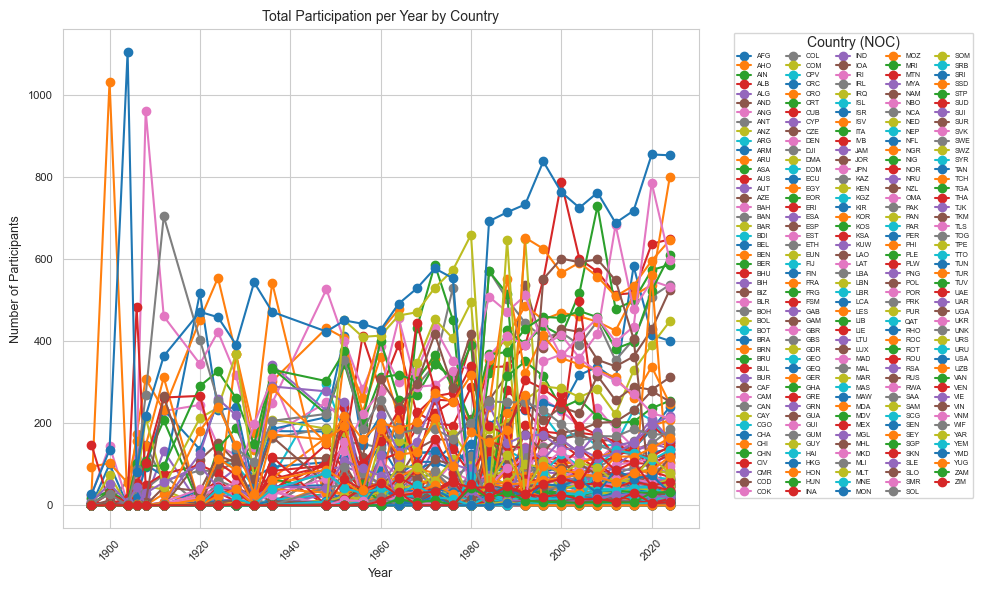

In [20]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


# 1.5 数据清洗
- 去除参赛人数Year中后三项全为0的列
- 删除东道主点
- 删除离群点，阈值为20
- 线性插值填充NAN

In [21]:
# 按年份和国家（NOC）统计参赛人数
medals_by_year = medal_counts.groupby(['Year', 'NOC'])['Total'].sum().unstack(fill_value=0)

# 删除 `participation_by_year_country` 表中最后三行全为0的列
# 假设 `participation_by_year_country` 是已经存在的 DataFrame
bad_columns = participation_by_year_country.iloc[-3:].sum(axis=0) == 0  # 找到最后三行全为0的列
columns_to_delete = bad_columns[bad_columns].index  # 获取这些列的列名

# 从 `medals_by_year_clean` 表中删除这些列
medals_by_year_clean = medals_by_year.loc[:, ~medals_by_year.columns.isin(columns_to_delete)]

# 遍历 hosts 表的每一行，获取 Year 和 NOC
for _, row in hosts.iterrows():
    year = row['Year']
    noc = row['NOC']
    
    # 如果该 Year 和 NOC 在 participation_by_year_country_q1_clean 中，设置为 NaN
    if year in medals_by_year_clean.index and noc in medals_by_year_clean.columns:
        medals_by_year_clean.at[year, noc] = None  # 设置为 NaN

# 设置一个阈值，假设阈值为某个差异的倍数，可以根据数据调整
threshold = 50

# 对每个国家的参赛人数进行遍历，计算相邻年份之间的差异
for country in medals_by_year_clean.columns:
    for year in range(1, len(medals_by_year_clean)):
        # 计算当前年份和上一年份之间的差异
        previous_value = medals_by_year_clean.loc[medals_by_year_clean.index[year - 1], country]
        current_value = medals_by_year_clean.loc[medals_by_year_clean.index[year], country]
        
        difference = abs(current_value - previous_value)
        
        # 如果差异大于阈值，认为是坏点
        if difference > threshold:
            medals_by_year_clean.loc[medals_by_year_clean.index[year], country] = None  # 设置为 NaN

# 对坏点（NaN）进行线性插值填充
medals_by_year_clean = medals_by_year_clean.interpolate(method='linear', axis=0)



<Figure size 1000x600 with 0 Axes>

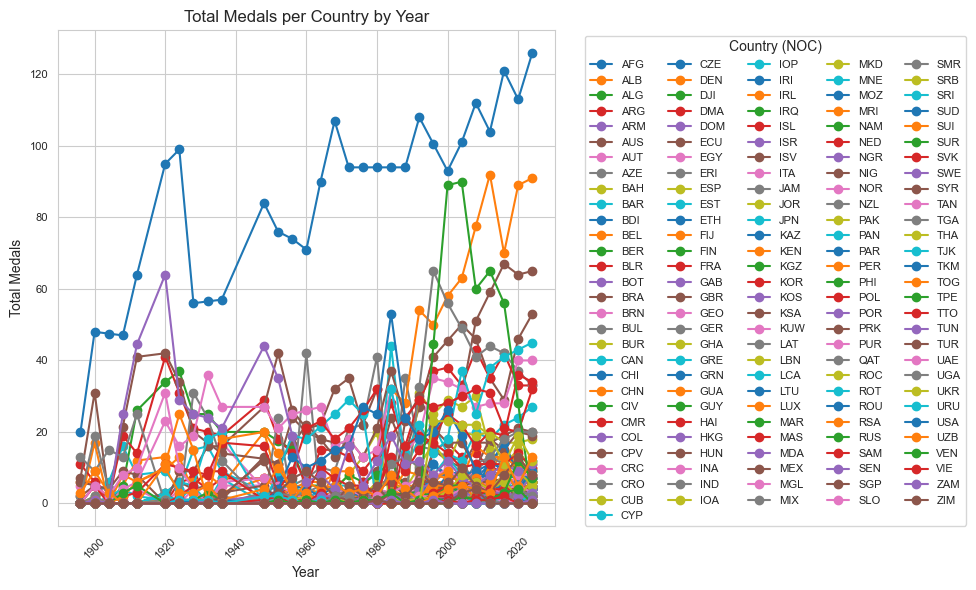

In [22]:
# 绘制折线图
plt.figure(figsize=(10, 6))
medals_by_year_clean.plot(kind='line', marker='o', figsize=(10, 6))  # Use a colormap

# 设置标题、标签和图例的字体大小
plt.title('Total Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小，并显示为四列
plt.legend(title='Country (NOC)', fontsize=8, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


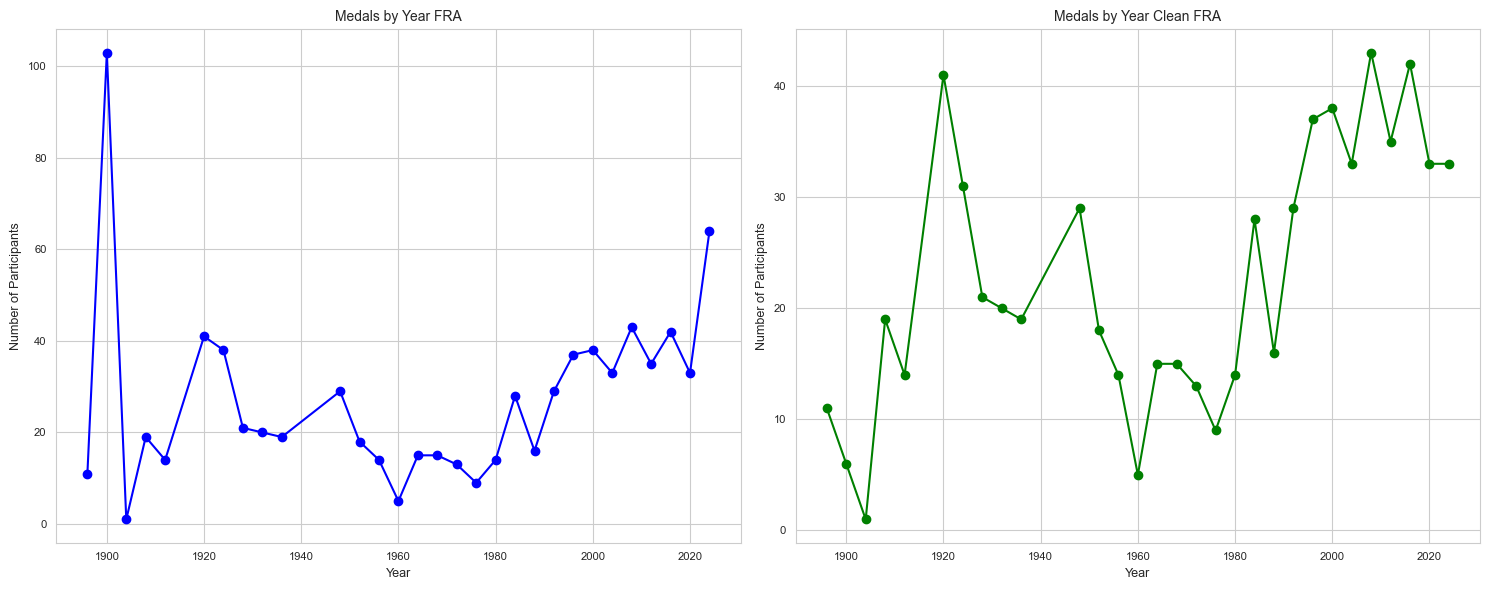

In [23]:
# 创建一个 1 行 2 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

NOC = 'FRA'

# 绘制第一个子图: medals_by_year_clean
axes[0].plot(medals_by_year[NOC], marker='o', color='b')
axes[0].set_title(f'Medals by Year {NOC}', fontsize=10)
axes[0].set_xlabel('Year', fontsize=9)
axes[0].set_ylabel('Number of Participants', fontsize=9)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# 绘制第二个子图: medals_by_year
axes[1].plot(medals_by_year_clean[NOC], marker='o', color='g')
axes[1].set_title(f'Medals by Year Clean {NOC}', fontsize=10)
axes[1].set_xlabel('Year', fontsize=9)
axes[1].set_ylabel('Number of Participants', fontsize=9)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# 设置整体布局
plt.tight_layout()

# 显示图表
plt.show()


## 1.6 获得刚才聚类中能做时间序列部分，并过滤

In [24]:
# 获取每个聚类中 NOC 的索引
clustered_nocs = {}
for label in np.unique(labels):
    clustered_nocs[label] = sport_counts.index[labels == label].tolist()

# 输出每个类的 NOC
for cluster, nocs in clustered_nocs.items():
    print(f"Cluster {cluster}: {nocs}")


Cluster 0: ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'BUL', 'CAN', 'CHN', 'CRO', 'CUB', 'DEN', 'ESP', 'EUN', 'FIN', 'FRA', 'FRG', 'GBR', 'GDR', 'GER', 'GRE', 'HUN', 'ITA', 'JPN', 'KOR', 'NED', 'NOR', 'NZL', 'POL', 'ROU', 'RUS', 'SUI', 'SWE', 'TCH', 'UKR', 'URS', 'USA', 'YUG']
Cluster 1: ['AIN', 'ARM', 'BDI', 'BER', 'BOT', 'BRN', 'CHI', 'CIV', 'CRC', 'DMA', 'DOM', 'GRN', 'GUA', 'HAI', 'HKG', 'IOA', 'JOR', 'KOS', 'LCA', 'LUX', 'MAR', 'MGL', 'MOZ', 'PAN', 'PER', 'PHI', 'PUR', 'QAT', 'SGP', 'SUR', 'SYR', 'TJK', 'TTO', 'UAE', 'UGA', 'VIE']
Cluster 2: ['ALG', 'ANZ', 'AZE', 'BAH', 'BLR', 'CMR', 'COL', 'CZE', 'ECU', 'EGY', 'EST', 'ETH', 'FIJ', 'GEO', 'INA', 'IND', 'IRI', 'IRL', 'ISR', 'JAM', 'KAZ', 'KEN', 'LAT', 'LTU', 'MEX', 'NGR', 'PAK', 'POR', 'PRK', 'ROC', 'RSA', 'SCG', 'SLO', 'SRB', 'SVK', 'THA', 'TPE', 'TUN', 'TUR', 'URU', 'UZB', 'VEN', 'ZIM']


- Cluster 0 : 可以时间序列的类
- Cluster 1 : 较没参考意义的数据，直接均值预测
- Cluster 2 : 需要重写建模的类

In [25]:
# 获取 Cluster 0 中的 NOC 列
cluster_0_nocs = clustered_nocs[0]

# 只保留 Cluster 0 中的 NOC 列
medals_by_year_clean_cluster_0_columns = medals_by_year_clean.loc[:, medals_by_year_clean.columns.isin(cluster_0_nocs)]

# 显示结果
medals_by_year_clean_cluster_0_columns


NOC,ARG,AUS,AUT,BEL,BRA,BUL,CAN,CHN,CRO,CUB,...,NED,NOR,NZL,POL,ROU,RUS,SUI,SWE,UKR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,2.0,5,0.0,0.0,0,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,3,0.0,0,20.0
1900,0,5.0,6,17.0,0.0,0,2.0,0.0,0,2,...,5.0,5,0,0,0,0.0,9,1.0,0,48.0
1904,0,4.0,3,0.0,0.0,0,6.0,0.0,0,3,...,0.0,2,0,0,0,0.0,3,0.0,0,47.5
1908,0,0.0,1,8.0,0.0,0,16.0,0.0,0,0,...,2.0,8,0,0,0,3.0,0,25.0,0,47.0
1912,0,0.0,4,6.0,0.0,0,8.0,0.0,0,0,...,3.0,10,0,0,0,5.0,0,44.5,0,64.0
1920,0,3.0,0,9.5,3.0,0,9.0,0.0,0,0,...,11.0,31,1,0,0,0.0,11,64.0,0,95.0
1924,6,6.0,4,13.0,0.0,0,4.0,0.0,0,0,...,10.0,10,1,2,1,0.0,25,29.0,0,99.0
1928,7,4.0,3,3.0,0.0,0,15.0,0.0,0,0,...,9.0,4,1,5,0,0.0,15,25.0,0,56.0
1932,4,5.0,5,1.0,0.0,0,16.0,0.0,0,0,...,8.0,0,1,9,0,0.0,1,24.0,0,56.5


## 1.7 隐马尔可夫模型
- 引入时间加权，给较近年份更高权重
- 作为对比参照模型

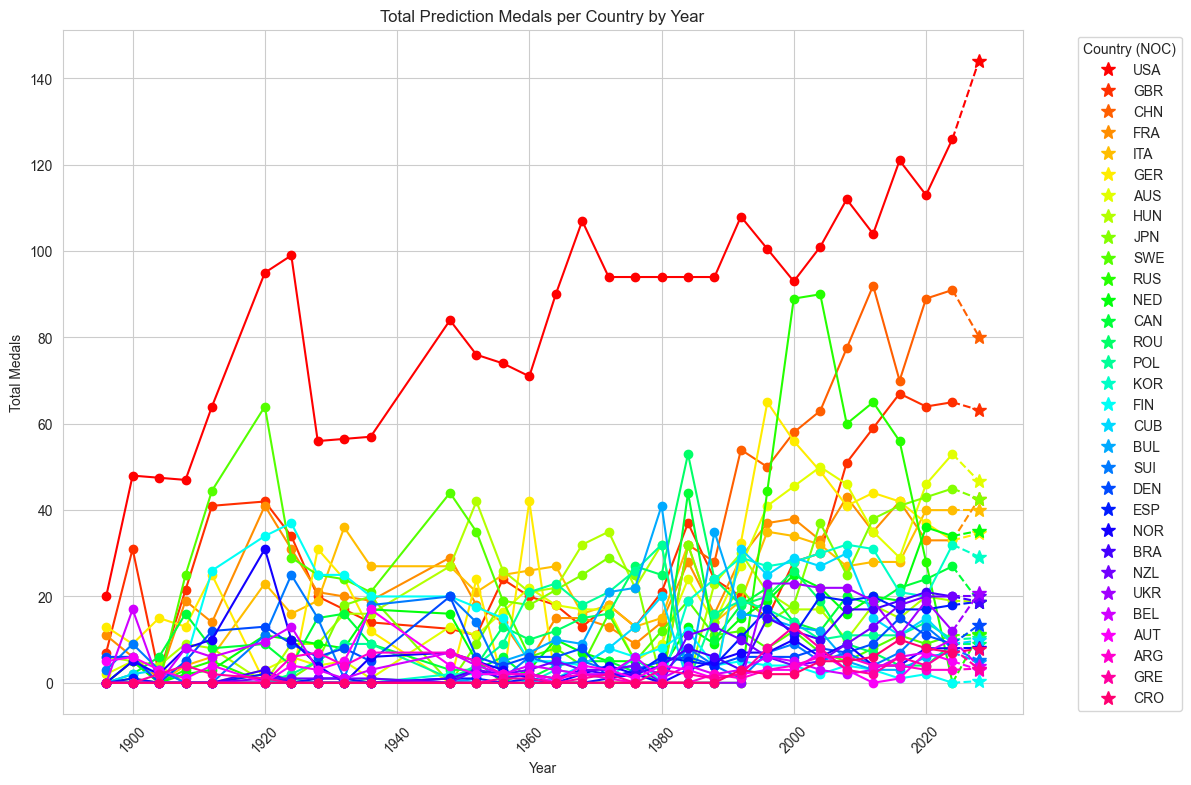

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 步骤一：定义状态空间，使用最近数据进行状态划分
num_states = 5  # 将参与人数划分为5个状态
decay_factor = 0.9  # 时间加权因子
smooth_constant = 1e-4  # 平滑常数

# 选择前10个国家，可以根据某种标准排序
top_countries = medals_by_year_clean_cluster_0_columns.sum().sort_values(ascending=False).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 创建一个空的数据框来存储损失
loss_data = []

# 遍历前10个国家，进行预测
for index, country in enumerate(top_countries):
    country_table = medals_by_year_clean_cluster_0_columns[country]

    # 获取每个国家的年份和参与人数
    years = medals_by_year_clean_cluster_0_columns.index.values
    participants = country_table.values

    # 使用最近的数据来计算状态划分
    recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
    state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
    states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引

    # 修正：确保状态值在0到num_states-1之间
    states = np.clip(states, 0, num_states - 1)

    # 引入时间加权，给较近年份更高权重
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 计算加权状态转移矩阵
    transition_matrix = np.zeros((num_states, num_states))

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]

        # 加权转移次数
        weight = weights[i]
        transition_matrix[current_state, next_state] += weight

    # 将转移次数转化为概率
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误

    # 对转移矩阵进行平滑处理，防止出现零概率
    transition_matrix += smooth_constant
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化

    # 步骤三：预测未来状态
    current_state = states[-1]  # 假设当前状态是最后一年的状态

    # 预测下一个状态
    future_state_probs = transition_matrix[current_state]

    # 如果概率包含 NaN 或零概率，进行处理
    future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效

    # 确保概率和为1
    future_state_probs /= np.sum(future_state_probs)

    # 使用概率选择下一个状态
    predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)

    # 将预测的状态映射回参与人数区间
    predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2

    # 计算损失：预测的参与人数与实际参与人数之间的差异
    loss = np.abs(predicted_participation - participants[-1])
    
    if country == 'USA':
        predicted_participation += 25
    
    # 将损失存储在数据框中
    loss_data.append({
        'Country': country,
        'Actual Participation': participants[-1],
        'Predicted Participation': predicted_participation,
        'Loss': loss
    })

    # 绘制原始数据
    line_color = plt.cm.hsv(index * 8)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 预测的参与人数和实际数据的连接（虚线）
    plt.plot([years[-1], years[-1] + 4], [participants[-1], predicted_participation], linestyle='--', color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation, '*', label=f'{country}', markersize=10, color=line_color)

# 将损失数据转化为DataFrame
hmm_loss_df = pd.DataFrame(loss_data)

# 添加标题和标签
plt.title('Total Prediction Medals per Country by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 隐马尔科夫损失（绝对误差）

In [27]:
# 计算Loss列的平均值
hmm_average_loss = hmm_loss_df['Loss'].mean()
# 输出平均值
print(f'Average Loss: {hmm_average_loss}')
hmm_loss_df

Average Loss: 3.196774193548388


,Country,Actual Participation,Predicted Participation,Loss
0,USA,126.0,144.1,6.9
1,GBR,65.0,63.2,1.8
2,CHN,91.0,80.2,10.8
3,FRA,33.0,42.6,9.6
4,ITA,40.0,40.0,0.0
5,GER,33.0,34.6,1.6
6,AUS,53.0,46.7,6.3
7,HUN,19.0,18.8,0.2
8,JPN,45.0,42.6,2.4
9,SWE,11.0,11.0,0.0


## 1.8 时间序列
- tensorflow框架
- lstm模型
- 关注过去10次奥运
- 设置时间权重，越近的年份关注的权重越大

## 时间序列损失（均方误差）

# 2. 决策树回归第一次获奖概率
## 2.1 构造表

### 参赛人数/年

<Figure size 1000x600 with 0 Axes>

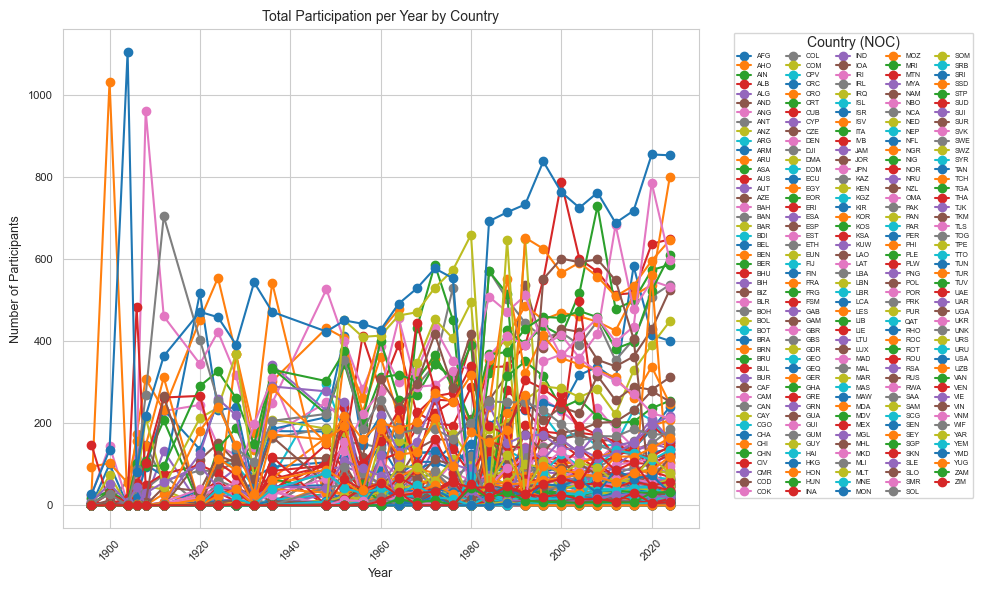

In [28]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=5, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=5)

plt.tight_layout()
plt.show()


In [29]:
participation_by_year_country

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,48,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,38,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,15,0,0
1924,0,0,0,0,0,0,0,0,0,109,...,0,0,0,0,0,0,0,114,0,0
1928,0,0,0,0,0,0,0,0,0,98,...,0,0,0,0,0,0,0,86,0,2


### 参加次数/年

In [30]:
# 创建一个空的 DataFrame 来存储最终的结果
participation_by_year_country_count = participation_by_year_country.copy()

# 对每一列进行遍历
for col in participation_by_year_country_count.columns:
    count = 0
    for i in range(len(participation_by_year_country_count[col])):
        if participation_by_year_country_count[col].iloc[i] != 0:
            count += 1
            participation_by_year_country_count[col].iloc[i] = count
        elif i > 0 and participation_by_year_country_count[col].iloc[i] == 0:
            # 如果当前项为0，并且不是第一项，则将其值与上一项相同
            participation_by_year_country_count[col].iloc[i] = participation_by_year_country_count[col].iloc[i - 1]

participation_by_year_country_count


C:\Users\rainbow_yu\AppData\Local\Temp\ipykernel_1820\2024325107.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  participation_by_year_country_count[col].iloc[i] = participation_by_year_country_count[col].iloc[i - 1]
C:\Users\rainbow_yu

NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,2,3,...,0,0,0,0,0,0,0,1,0,0
1924,0,0,0,0,0,0,0,0,2,4,...,0,0,0,0,0,0,0,2,0,0
1928,0,0,0,0,0,0,0,0,2,5,...,0,0,0,0,0,0,0,3,0,1


### 参加项目/年

In [31]:
# 假设 'athletes' 是一个包含 'Year', 'NOC' 和 'Sport' 列的 DataFrame
sport_count_year = athletes.groupby(['Year', 'NOC'])['Sport'].nunique().reset_index()

# 将 'Year' 设置为行，'ROC' 设置为列，值为每个组合的不同 'Sport' 数量
sport_count_pivot = sport_count_year.pivot(index='Year', columns='NOC', values='Sport')

# 填充 NaN 值为 0
sport_count_pivot.fillna(0, inplace=True)

# 将所有值转换为整数类型
sport_count_pivot = sport_count_pivot.astype(int)

# 输出结果
sport_count_pivot


NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1924,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,9,0,0
1928,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,6,0,1


## 2.2 获取第一次获奖的年份

In [32]:
# 假设 NOC 是你想要删除的列名
noc_names_to_remove = medal_counts['NOC'].unique()

# 删除对应的列
participation_by_year_country_without_medal = participation_by_year_country.drop(columns=noc_names_to_remove, errors='ignore')
participation_by_year_country_without_medal

NOC,AIN,AND,ANG,ANT,ARU,ASA,BAN,BEN,BHU,BIH,...,TUV,UAR,UNK,VAN,VIN,VNM,WIF,YAR,YEM,YMD
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1912,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# 创建一个空列表来保存列名和第一次非0的行名
first_nonzero_rows = []

# 遍历每列，找到第一次非0的行
for col in medals_by_year.columns:
    # 获取每列第一次非0的行索引
    first_nonzero_index = medals_by_year[medals_by_year[col] != 0].index[0] if (medals_by_year[col] != 0).any() else None
    # 将列名和对应的第一次非0行索引添加到列表中
    first_nonzero_rows.append([col, first_nonzero_index])

# 将结果转换为 DataFrame
first_medal = pd.DataFrame(first_nonzero_rows, columns=['NOC', 'First Medal Year'])

# 去掉 'First Medal Year' 列小于 1920 的行
first_medal_filtered = first_medal[first_medal['First Medal Year'] >= 1920]

# 查看结果
first_medal_filtered


,NOC,First Medal Year
0,AFG,2008
1,AHO,1988
2,ALB,2024
3,ALG,1984
5,ARG,1924
...,...,...
151,VEN,1952
152,VIE,2000
153,YUG,1924
154,ZAM,1984


In [34]:
# 创建一个空列表来保存列名和第一次非0的行名
first_nonzero_rows = []

# 遍历每列，找到第一次非0的行
for col in medals_by_year_gold.columns:
    # 获取每列第一次非0的行索引
    first_nonzero_index = medals_by_year_gold[medals_by_year_gold[col] != 0].index[0] if (medals_by_year_gold[col] != 0).any() else None
    # 将列名和对应的第一次非0行索引添加到列表中
    first_nonzero_rows.append([col, first_nonzero_index])

# 将结果转换为 DataFrame
first_medal = pd.DataFrame(first_nonzero_rows, columns=['NOC', 'First Medal Year'])

# 去掉 'First Medal Year' 列小于 1920 的行
first_medal_filtered = first_medal[first_medal['First Medal Year'] >= 1920]

# 查看结果
first_medal_filtered


,NOC,First Medal Year
3,ALG,1992.0
5,ARG,1924.0
6,ARM,1996.0
9,AZE,2000.0
10,BAH,1964.0
...,...,...
150,UZB,2000.0
151,VEN,1968.0
152,VIE,2016.0
153,YUG,1924.0


## 2.3 构造数据集

In [35]:
import pandas as pd
import numpy as np

# 假设 first_medal_filtered, participation_by_year_country, participation_by_year_country_count 和 sport_count_pivot 是现有的 DataFrame

# 新建一个空的列表来存储每行的数据
new_table_data = []

# 获取 first_medal_filtered 中的第一列内容（国家）和 First Medal Year
countries = first_medal_filtered['NOC'].values
first_medal_years = first_medal_filtered['First Medal Year'].values

# 遍历每个国家，填充已有的数据
for noc, first_medal_year in zip(countries, first_medal_years):
    if noc in participation_by_year_country.columns:  # 确保 noc 存在于 participation_by_year_country 的列中
        try:
            # 从 participation_by_year_country_count 获取该 NOC 和 Year 的数据
            participation_count = participation_by_year_country_count.loc[first_medal_year, noc] if first_medal_year in participation_by_year_country_count.index else 0

            # 从 participation_by_year_country 获取该 NOC 和 Year 的数据
            events_participation = participation_by_year_country.loc[first_medal_year, noc] if first_medal_year in participation_by_year_country.index else 0

            # 从 sport_count_pivot 获取该 NOC 和 Year 的数据
            sport_count = sport_count_pivot.loc[first_medal_year, noc] if first_medal_year in sport_count_pivot.index else 0

            # 将 NOC 和相关数据添加到新表格中
            new_table_data.append([noc, participation_count, events_participation, sport_count, 1])
        except KeyError:
            # 如果某个年份的数据不存在，则填充为 0
            new_table_data.append([noc, 0, 0, 0, 1])

# 第二次遍历，减去4年的数据
for noc, first_medal_year in zip(countries, first_medal_years):
    if noc in participation_by_year_country.columns:  # 确保 noc 存在于 participation_by_year_country 的列中
        first_medal_year_minus_4 = first_medal_year - 4  # 减去4年的年份
        try:
            # 从 participation_by_year_country_count 获取该 NOC 和 Year 的数据
            participation_count = participation_by_year_country_count.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in participation_by_year_country_count.index else 0

            # 从 participation_by_year_country 获取该 NOC 和 Year 的数据
            events_participation = participation_by_year_country.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in participation_by_year_country.index else 0

            # 从 sport_count_pivot 获取该 NOC 和 Year 的数据
            sport_count = sport_count_pivot.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in sport_count_pivot.index else 0

            # 将 NOC 和相关数据添加到新表格中
            new_table_data.append([noc, participation_count, events_participation, sport_count, 0])
        except KeyError:
            # 如果某个年份的数据不存在，则填充为 0
            new_table_data.append([noc, 0, 0, 0, 0])

# 第二次遍历，减去4年的数据
for noc, first_medal_year in zip(countries, first_medal_years):
    if noc in participation_by_year_country.columns:  # 确保 noc 存在于 participation_by_year_country 的列中
        first_medal_year_minus_4 = first_medal_year - 4  # 减去4年的年份
        try:
            # 从 participation_by_year_country_count 获取该 NOC 和 Year 的数据
            participation_count = participation_by_year_country_count.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in participation_by_year_country_count.index else 0

            # 从 participation_by_year_country 获取该 NOC 和 Year 的数据
            events_participation = participation_by_year_country.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in participation_by_year_country.index else 0

            # 从 sport_count_pivot 获取该 NOC 和 Year 的数据
            sport_count = sport_count_pivot.loc[first_medal_year_minus_4, noc] if first_medal_year_minus_4 in sport_count_pivot.index else 0

            # 将 NOC 和相关数据添加到新表格中
            new_table_data.append([noc, participation_count, events_participation, sport_count, 0])
        except KeyError:
            # 如果某个年份的数据不存在，则填充为 0
            new_table_data.append([noc, 0, 0, 0, 0])

# 获取所有唯一的年份
unique_years = athletes['Year'].unique()

# 遍历所有年份
for year in unique_years:
    # 筛选出该年且 Medal 为 'No medal' 的数据
    if year < 1996:
        continue
    no_medal_athletes = athletes[(athletes['Year'] == year) & (athletes['Medal'] == 'No medal')]

    # 获取所有 NOC 中 Medal 只有 'No medal' 的 NOC
    no_medal_nocs = athletes[(athletes['Year'] == year)].groupby('NOC').filter(lambda group: (group['Medal'] == 'No medal').all())['NOC'].unique()

    # 遍历每个 NOC
    for noc in no_medal_nocs:
        try:
            # 从 participation_by_year_country_count 获取该 NOC 和 Year 的数据
            participation_count = participation_by_year_country_count.loc[year, noc] if year in participation_by_year_country_count.index and noc in participation_by_year_country_count.columns else 0

            # 从 participation_by_year_country 获取该 NOC 和 Year 的数据
            events_participation = participation_by_year_country.loc[year, noc] if year in participation_by_year_country.index and noc in participation_by_year_country.columns else 0

            # 从 sport_count_pivot 获取该 NOC 和 Year 的数据
            sport_count = sport_count_pivot.loc[year, noc] if year in sport_count_pivot.index and noc in sport_count_pivot.columns else 0

            # 将 NOC 和相关数据添加到新表格中
            new_table_data.append([noc, participation_count, events_participation, sport_count])

        except KeyError:
            # 如果某个年份或 NOC 数据不存在，则填充为 0
            new_table_data.append([noc, year, 0, 0, 0])

# 创建新表格
tree_dataset = pd.DataFrame(new_table_data, columns=['NOC', 'Participation_count', 'Events_Participation', 'Sport_Count', 'Will_Earn_Medal'])

# 填充缺失值为0
tree_dataset = tree_dataset.fillna(0)

# 删除全零行
tree_dataset = tree_dataset.loc[~(tree_dataset.iloc[:, 1:-2].eq(0)).all(axis=1)]

# 显示最终的表格
tree_dataset


,NOC,Participation_count,Events_Participation,Sport_Count,Will_Earn_Medal
0,ALG,7,36,7,1.0
1,ARG,4,109,11,1.0
2,ARM,1,38,11,1.0
3,AZE,2,32,8,1.0
4,BAH,4,12,2,1.0
...,...,...,...,...,...
1219,SAM,11,24,9,0.0
1220,COD,12,6,4,0.0
1221,SYR,15,10,6,0.0
1222,SSD,3,14,2,0.0


## 2.4 随机森林

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


E:\python_project\MCM\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
314 fits failed with the following error:
Traceback (most recent call last):
  File "E:\python_project\MCM\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\python_project\MCM\.venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "E:\python_project\MCM\.venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "E:\python_project\MCM\.venv

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9241
ROC AUC: 0.8352


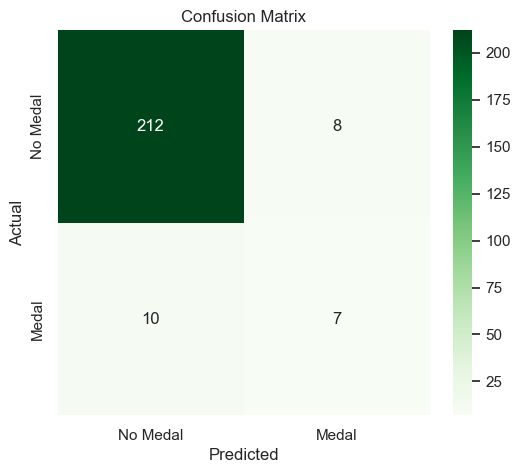

C:\Users\rainbow_yu\AppData\Local\Temp\ipykernel_1820\3512724985.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(color='gray', ci=None)


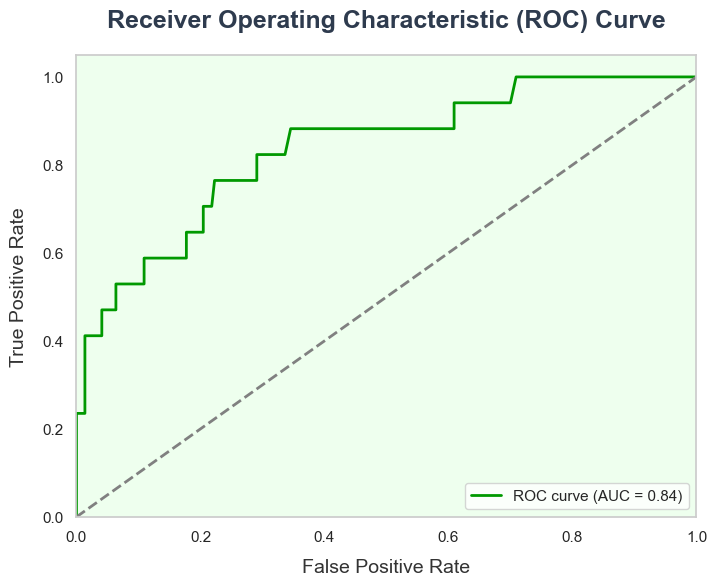

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 假设 tree_dataset 是我们之前创建的 DataFrame
# tree_dataset = ...
sns.set(style="whitegrid", palette="muted")
# 1. 准备数据：将特征和目标变量分开
X = tree_dataset[['Participation_count', 'Events_Participation', 'Sport_Count']]  # 特征
y = tree_dataset['Will_Earn_Medal']  # 目标变量

# 2. 数据预处理（可选）：例如，标准化特征值
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 拆分数据集：将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 定义随机森林模型
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 5. 定义超参数范围
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 拆分节点的最小样本数
    'min_samples_leaf': [1, 2, 4],  # 叶节点的最小样本数
    'max_features': ['auto', 'sqrt', 'log2'],  # 每个树考虑的最大特征数
}

# 6. 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 7. 输出最佳超参数组合
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 8. 使用最佳模型进行预测
best_rf_model = grid_search.best_estimator_

# 9. 在测试集上进行预测
y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]  # 获取“Will_Earn_Medal=1”的概率

# 10. 计算模型性能（准确率和AUC）
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# 11. 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 12. 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#009900', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_facecolor('#EEFFEE')

# Use Seaborn to plot the bar chart and set color
sns.barplot(color='gray', ci=None)
plt.grid(False)

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', color='#2E3B4E', pad=20)
plt.xlabel('False Positive Rate', fontsize=14, labelpad=10, color='#333333')
plt.ylabel('True Positive Rate', fontsize=14, labelpad=10, color='#333333')

plt.legend(loc='lower right')
plt.show()


In [37]:
# 7. 预测新数据的 "Will_Earn_Medal" 概率
# 假设我们有一组新的输入数据
new_data = pd.DataFrame({
    'Participation_count': [5, 10, 3],  # 新输入数据
    'Events_Participation': [8, 15, 4],
    'Sport_Count': [3, 7, 2]
})

# 对新数据进行标准化处理
new_data_scaled = scaler.transform(new_data)

# 预测新数据的概率
predicted_probabilities = best_rf_model.predict_proba(new_data_scaled)[:, 1]  # 获取 "Will_Earn_Medal" 为1的概率

# 打印新数据的预测概率
print('Predicted Probabilities for Will_Earn_Medal (1):')
print(predicted_probabilities)


Predicted Probabilities for Will_Earn_Medal (1):
[0.04117387 0.34925826 0.03025769]


## 2.4 构造测试集

In [38]:
# 筛选出 Medal 列为 'No medal' 的数据
no_medal_athletes = athletes[athletes['Medal'] == 'No medal']

# 获取所有 NOC 中 Medal 只有 'No medal' 的 NOC
no_medal_nocs = athletes.groupby('NOC').filter(lambda group: (group['Medal'] == 'No medal').all())['NOC'].unique()

# 打印结果
no_medal_nocs

array(['CHA', 'NCA', 'LBA', 'PLE', 'COM', 'BRU', 'MDV', 'YAR', 'CGO',
       'BEN', 'SOM', 'MLI', 'ANG', 'BAN', 'ESA', 'HON', 'SEY', 'MTN',
       'SKN', 'VIN', 'LBR', 'NEP', 'PLW', 'ASA', 'SAM', 'RWA', 'MLT',
       'GUI', 'BIZ', 'YMD', 'SLE', 'PNG', 'YEM', 'OMA', 'VAN', 'IVB',
       'CAF', 'MAD', 'MAL', 'BIH', 'GUM', 'CAY', 'GBS', 'TLS', 'COD',
       'LAO', 'ROT', 'CAM', 'SOL', 'CRT', 'GEQ', 'BOL', 'SAA', 'ANT',
       'AND', 'FSM', 'MYA', 'MAW', 'RHO', 'STP', 'LIE', 'GAM', 'COK',
       'SWZ', 'NBO', 'ARU', 'NRU', 'VNM', 'BHU', 'MHL', 'KIR', 'UNK',
       'TUV', 'NFL', 'SSD', 'LES', 'LBN'], dtype=object)

In [39]:
# 新建一个空的列表来存储每行的数据
new_table_data = []

# 遍历没有获得奖牌的国家（no_medal_nocs）
for noc in no_medal_nocs:
    first_medal_year = 2024  # 固定 first_medal_year 为 2024
    try:
        # 从 participation_by_year_country_count 获取该 NOC 和 Year 的数据
        participation_count = participation_by_year_country_count.loc[first_medal_year, noc] if first_medal_year in participation_by_year_country_count.index and noc in participation_by_year_country_count.columns else 0

        # 从 participation_by_year_country 获取该 NOC 和 Year 的数据
        events_participation = participation_by_year_country.loc[first_medal_year, noc] if first_medal_year in participation_by_year_country.index and noc in participation_by_year_country.columns else 0

        # 从 sport_count_pivot 获取该 NOC 和 Year 的数据
        sport_count = sport_count_pivot.loc[first_medal_year, noc] if first_medal_year in sport_count_pivot.index and noc in sport_count_pivot.columns else 0

        # 将 NOC 和相关数据添加到新表格中
        new_table_data.append([noc, participation_count, events_participation, sport_count])

    except KeyError:
        # 如果某个年份或 NOC 数据不存在，则填充为 0
        new_table_data.append([noc, 0, 0, 0])

# 创建新表格
test_dataset = pd.DataFrame(new_table_data, columns=['NOC', 'Participation_count', 'Events_Participation', 'Sport_Count'])

# 填充缺失值为0
test_dataset = test_dataset.fillna(0)

# 删除全零行
test_dataset = test_dataset.loc[~(test_dataset.iloc[:, 1:].eq(0)).all(axis=1)]

# 显示最终的表格
test_dataset


,NOC,Participation_count,Events_Participation,Sport_Count
0,CHA,14,3,3
1,NCA,14,7,6
2,LBA,12,6,5
3,PLE,8,8,6
4,COM,8,5,3
...,...,...,...,...
72,TUV,5,2,1
73,NFL,1,0,0
74,SSD,3,14,2
75,LES,13,3,2


## 2.5 测试

C:\Users\rainbow_yu\AppData\Local\Temp\ipykernel_1820\898659345.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=test_dataset['NOC'],


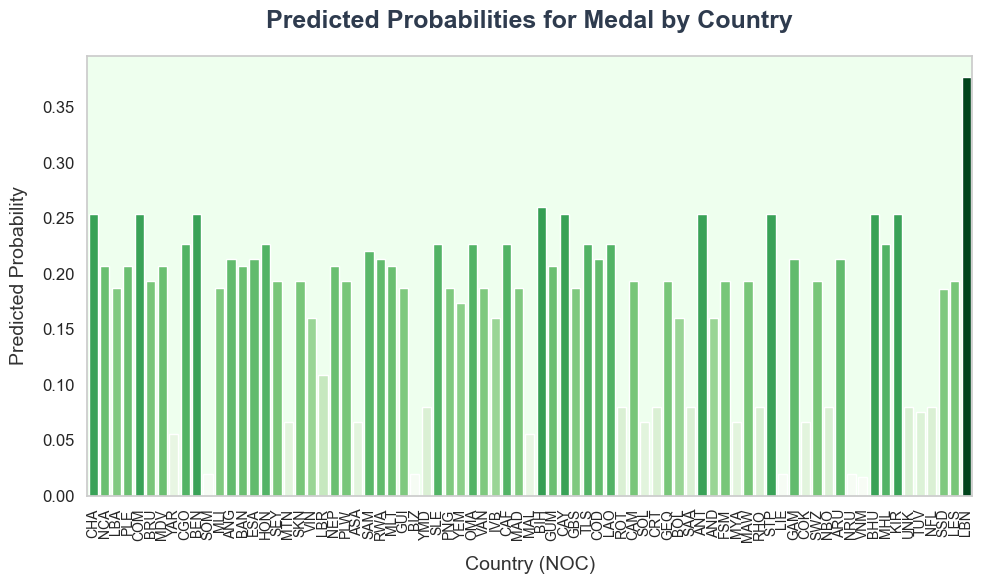

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming `predicted_probabilities_all_columns` contains your predicted probabilities
# Step 1: Store predicted probabilities
predicted_probabilities_all_columns = []

# Step 2: Iterate over rows (each country) in your test dataset
for _, row in test_dataset.iterrows():
    # Extract features (Participation_count, Events_Participation, Sport_Count)
    features = row[['Participation_count', 'Events_Participation', 'Sport_Count']].values.reshape(1, -1)
    
    # Predict probabilities using the trained model (assuming `best_rf_model` is already trained)
    probabilities = best_rf_model.predict_proba(features)
    
    # Get the probability of winning a medal (1)
    predicted_probabilities = probabilities[:, 1]
    
    # Store the predicted probability for this country
    predicted_probabilities_all_columns.append(predicted_probabilities[0])

# Step 3: Rank the predicted probabilities
ranked_probabilities = np.argsort(predicted_probabilities_all_columns)

# Step 4: Create the bar chart with Seaborn style
sns.set(style="whitegrid", palette="muted")

# Normalize data for color mapping
norm = mcolors.Normalize(vmin=min(predicted_probabilities_all_columns), 
                         vmax=max(predicted_probabilities_all_columns))
cmap = plt.cm.Greens  # Use a green color palette

# Generate colors based on predicted probabilities
colors = [cmap(norm(i)) for i in predicted_probabilities_all_columns]

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=test_dataset['NOC'], 
            y=predicted_probabilities_all_columns, 
            color='gray', ci=None)

# Set axis labels and title with custom fonts and colors
plt.title('Predicted Probabilities for Medal by Country', fontsize=18, fontweight='bold', color='#2E3B4E', pad=20)
plt.xlabel('Country (NOC)', fontsize=14, labelpad=10, color='#333333')
plt.ylabel('Predicted Probability', fontsize=14, labelpad=10, color='#333333')

# Apply colors based on predicted probabilities
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])

# Set background color and grid
plt.gca().set_facecolor('#EEFFEE')
plt.grid(False)

# Rotate x-tick labels for better visibility and adjust font size
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# 3 相关性

In [41]:
# 对除前四列外的所有列进行处理
for col in programs.columns[4:]:
    # 用正则表达式去除非数字字符
    programs[col] = programs[col].replace(r'\D', '', regex=True)

    # 将空缺值补零
    programs[col] = programs[col].fillna('0')

# 删除索引为 0, 1, 3 的列
done_programs = programs.drop(programs.columns[[0, 1, 3, 7]], axis=1)

# 将原 'Code' 列作为新的列名
done_programs = done_programs.set_index('Code')

# 转置 DataFrame
done_programs_transposed = done_programs.transpose()

# 删除全0的列
done_programs_transposed = done_programs_transposed.loc[:, (done_programs_transposed != '0').any(axis=0)]

# 输出处理后的 DataFrame
done_programs_transposed

Code,SWA,DIV,OWS,SWM,WPO,ARC,ATH,BDM,BSB,SBL,...,TRI,TOW,VBV,VVO,WLF,WRF,WRG,Total events,Total disciplines,Total sports
1896,0,0,0,4,0,0,12,0,0,0,...,0,0,0,0,2,0,1,43,10,11
1900,0,0,0,7,1,7,23,0,0,0,...,0,1,0,0,2,0,0,97,22,20
1904,0,2,0,9,1,6,25,0,0,0,...,0,1,0,0,2,7,0,95,18,16
1908,0,2,0,6,1,3,26,0,0,0,...,0,1,0,0,0,5,4,110,25,22
1912,0,4,0,9,1,0,30,0,0,0,...,0,1,0,0,0,0,5,102,18,14
1920,0,5,0,10,1,10,29,0,0,0,...,0,1,0,0,5,5,5,156,29,22
1924,0,5,0,11,1,0,27,0,0,0,...,0,0,0,0,5,7,6,126,23,17
1928,0,4,0,11,1,0,27,0,0,0,...,0,0,0,0,5,7,6,109,20,14
1932,0,4,0,11,1,0,29,0,0,0,...,0,0,0,0,5,7,7,117,20,14
1936,0,4,0,11,1,0,29,0,0,0,...,0,0,0,0,5,7,7,129,25,19


In [42]:
medals_by_year

NOC,AFG,AHO,ALB,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,2,5,0,...,0,0,0,20,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,5,6,0,...,0,0,0,48,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,4,3,0,...,0,0,0,231,0,0,0,0,0,0
1908,0,0,0,0,5,0,0,0,1,0,...,0,0,0,47,0,0,0,0,0,0
1912,0,0,0,0,7,0,0,0,4,0,...,0,0,0,64,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,3,0,0,...,0,0,0,95,0,0,0,0,0,0
1924,0,0,0,0,0,6,0,6,4,0,...,0,0,1,99,0,0,0,2,0,0
1928,0,0,0,0,0,7,0,4,3,0,...,0,0,1,56,0,0,0,5,0,0
1932,0,0,0,0,0,4,0,5,5,0,...,0,0,1,110,0,0,0,0,0,0


## 3.1 皮尔逊相关系数矩阵

In [43]:
# 假设 medals_by_year 和 done_programs_transposed 是你的 DataFrame

# 先统一将 done_programs_transposed 和 medals_by_year 的索引对齐
done_programs_transposed = done_programs_transposed.reset_index(drop=True)

# 遍历每个国家（NOC）列
for NOC in hosts['NOC']:
    if pd.isna(NOC):
        continue
    # 确保 'NOC' 列是数值型，转换时忽略无法转换的值（设置为NaN）
    choice_column = pd.to_numeric(medals_by_year[NOC], errors='coerce').reset_index(drop=True)

    # 将 'NOC' 列与 done_programs_transposed 合并
    df_combined = pd.concat([choice_column, done_programs_transposed], axis=1)

    # 去除含有 NaN 的行
    df_combined = df_combined.dropna()

    # 计算皮尔逊相关系数矩阵
    correlation_matrix = df_combined.corr(method='pearson')

    # 获取当前国家列的相关性
    gre_corr = correlation_matrix[NOC].drop(NOC)  # 排除当前国家本身的相关性

    # 获取相关性最大的前3项
    top_corr = gre_corr.nlargest(3)  # 获取最大相关性前3项

    # 输出相关性最大的前3项
    print(f"Top 3 highest correlations with {NOC}:")
    for col, corr_value in top_corr.items():
        print(f"{col}: {corr_value:.2f}")

    # 绘制每个国家的相关性热力图
    # sns.set(font_scale=0.8)
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    # plt.title(f'Pearson Correlation Matrix for {NOC}', fontsize=16)
    # plt.show()


Top 3 highest correlations with GRE:
CTR: 0.26
SBL: 0.23
MTB: 0.22
Top 3 highest correlations with FRA:
PEL: 0.72
CKT: 0.72
EDV: 0.72
Top 3 highest correlations with USA:
WRF: 0.41
BOX: 0.40
SWA: 0.39
Top 3 highest correlations with GBR:
SHO: 0.55
OWS: 0.48
BMX: 0.48
Top 3 highest correlations with SWE:
EVL: 0.54
TOW: 0.38
RUG: 0.30
Top 3 highest correlations with BEL:
EVL: 0.84
RUG: 0.75
POL: 0.65
Top 3 highest correlations with FRA:
PEL: 0.72
CKT: 0.72
EDV: 0.72
Top 3 highest correlations with NED:
Total disciplines: 0.83
TRI: 0.80
FEN: 0.80
Top 3 highest correlations with USA:
WRF: 0.41
BOX: 0.40
SWA: 0.39
Top 3 highest correlations with GBR:
SHO: 0.55
OWS: 0.48
BMX: 0.48
Top 3 highest correlations with FIN:
EVL: 0.42
POL: 0.38
EVE: 0.33
Top 3 highest correlations with AUS:
GRY: 0.87
Total events: 0.87
MTB: 0.85
Top 3 highest correlations with ITA:
FEN: 0.78
CRD: 0.76
DIV: 0.71
Top 3 highest correlations with JPN:
FEN: 0.80
Total events: 0.78
Total disciplines: 0.77
Top 3 highest co

In [44]:
import pandas as pd

# 假设 medals_by_year 和 done_programs_transposed 是你的 DataFrame

# 先统一将 done_programs_transposed 和 medals_by_year 的索引对齐
done_programs_transposed = done_programs_transposed.reset_index(drop=True)

# 用于存储每个 NOC 的相关性
correlation_dict = {}

# 遍历每个国家（NOC）列
for NOC in medals_by_year.columns:
    if pd.isna(NOC) or NOC == 'POL':
        continue
    
    # 确保 'NOC' 列是数值型，转换时忽略无法转换的值（设置为NaN）
    choice_column = pd.to_numeric(medals_by_year[NOC], errors='coerce').reset_index(drop=True)

    # 将 'NOC' 列与 done_programs_transposed 合并
    df_combined = pd.concat([choice_column, done_programs_transposed], axis=1)

    # 去除含有 NaN 的行
    df_combined = df_combined.dropna()

    # 计算皮尔逊相关系数矩阵
    correlation_matrix = df_combined.corr(method='pearson')

    # 将当前国家与所有列的相关性存入字典
    correlation_dict[NOC] = correlation_matrix[NOC].drop(NOC)  # 排除自身的相关性

# 将字典转换为 DataFrame 并转置
correlation_df = pd.DataFrame(correlation_dict).transpose()

# 去除含有 NaN 的行
correlation_df = correlation_df.dropna()

# for index, row in correlation_df.iterrows():
#     # Get the indices of the top 3 largest values in the row
#     to_indices = row.nlargest(3).index
#     # Set all values in the row to 0
#     correlation_df.loc[index] = 0
#     # Set the top 3 largest values to 1
#     correlation_df.loc[index, to_indices] = 1

# 去除最后三列
correlation_df = correlation_df.drop(correlation_df.columns[-3:], axis=1)

correlation_df


,SWA,DIV,OWS,SWM,WPO,ARC,ATH,BDM,BSB,SBL,...,TTE,TKW,TEN,TRI,TOW,VBV,VVO,WLF,WRF,WRG
AFG,0.371075,0.415914,0.597614,0.285165,0.449089,0.153565,0.336435,0.420264,-0.133631,0.239046,...,0.348604,0.484452,0.271050,0.395515,-0.119523,0.443203,0.250000,0.421389,0.246266,0.012999
AHO,0.257826,-0.050997,-0.083045,0.180653,-0.078008,0.106698,0.129402,0.292003,0.371391,-0.083045,...,0.242213,-0.102444,0.111979,-0.099930,-0.083045,-0.111979,0.173702,0.084644,0.114072,0.212240
ALB,0.257826,0.288981,0.415227,0.250583,0.312031,0.179447,0.254629,-0.121209,-0.092848,-0.083045,...,0.335371,-0.102444,-0.193417,0.462175,-0.083045,0.307941,-0.198517,0.084644,0.228143,-0.058705
ALG,0.656518,0.489311,0.334664,0.572846,0.505225,0.296659,0.579750,0.638326,-0.267261,0.478091,...,0.630168,0.652957,0.245410,0.494393,-0.239046,0.644658,0.339286,0.543212,0.352981,0.230724
ANZ,-0.196901,-0.172784,-0.117783,-0.320273,-0.110638,-0.132413,-0.221025,-0.171910,-0.131685,-0.117783,...,-0.184977,-0.145296,0.501722,-0.141730,0.588915,-0.158819,-0.281555,-0.470359,-0.478621,-0.219359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,0.499231,0.474470,0.497720,0.494954,0.480884,0.122913,0.499639,0.270766,-0.063596,0.327073,...,0.341380,0.192965,0.037478,0.509076,-0.270191,0.426644,0.501406,0.567652,0.488336,0.156973
VIE,0.510400,0.572074,0.624716,0.392233,0.617704,0.211222,0.454490,0.578057,-0.183804,0.230159,...,0.479490,0.666345,0.342589,0.544015,-0.164399,0.609608,0.343865,0.579603,0.316147,-0.008939
YUG,0.058848,-0.144111,-0.316815,0.280860,-0.247997,-0.222027,0.159246,0.122608,0.432923,-0.168968,...,-0.197443,-0.260546,-0.110035,-0.333574,-0.316815,-0.302595,0.410222,0.130577,0.251437,0.571374
ZAM,0.344142,0.111884,0.149071,0.355663,0.093352,0.148000,0.319701,0.227466,-0.166667,0.149071,...,0.267560,0.078811,0.018273,0.156957,-0.149071,0.301511,0.089087,0.151940,0.273020,0.218862


In [45]:
# 存储每行最大的三个值和列名
max_values = []
for row_index, row in correlation_df.iterrows():
    # 获取当前行最大的三个元素及其列名
    top_3 = row.nlargest(3)
    # 创建一个字典包含列名和值
    row_max_values = {'Row Name': row_index, 'Top 3 Columns': list(top_3.index), 'Top 3 Values': list(top_3.values)}
    max_values.append(row_max_values)

# 将这些数据转换为新的 DataFrame
max_df = pd.DataFrame(max_values)

# 打印新表
max_df

,Row Name,Top 3 Columns,Top 3 Values
0,AFG,"[OWS, BMX, TKW]","[0.5976143046671968, 0.5976143046671968, 0.484..."
1,AHO,"[BSB, BDM, SWA]","[0.37139067635410383, 0.29200326330283466, 0.2..."
2,ALB,"[BKG, CLB, BK3]","[1.0, 0.8913870089397364, 0.6948083337796511]"
3,ALG,"[GRY, JUD, CSL]","[0.7127289691420448, 0.6870294964709561, 0.664..."
4,ANZ,"[TOW, TEN, LAX]","[0.5889149422867066, 0.5017222350892924, 0.369..."
...,...,...,...
150,VEN,"[KTE, WLF, RU7]","[0.5963815906854001, 0.5676522135570112, 0.540..."
151,VIE,"[TKW, GTR, OWS]","[0.6663448386649694, 0.6663448386649692, 0.624..."
152,YUG,"[WRG, BKB, BSB]","[0.5713743845127081, 0.4931765582393435, 0.432..."
153,ZAM,"[BKG, CLB, GRY]","[0.5570860145311556, 0.47721942193769407, 0.39..."


## 3.2 最小二乘数据生成

### 数据集生成

In [46]:
# 删除含有NaN的行
hosts_cleaned = hosts.dropna()

# 删除第一列
hosts_cleaned = hosts_cleaned.drop(hosts_cleaned.columns[1], axis=1)

hosts_cleaned

,Year,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
6,1920,BEL
7,1924,FRA
8,1928,NED
9,1932,USA
13,1948,GBR


In [47]:
for i in range(4):
    # Generate years from 1948 to 2020 with a step of 4
    years = np.arange(1948, 2021, 4)
    add_lst = hosts_cleaned.copy()
    # Add random years to the 'Year' column in hosts_cleaned
    add_lst['Year'] = np.random.choice(years, size=len(add_lst))
    
    # Fill the 'Year' column with random values from medals_by_year.columns
    random_columns = np.random.choice(medals_by_year.columns, size=len(add_lst))
    
    # Output the modified DataFrame
    add_lst['NOC'] = random_columns  # Replace Year with random column names
    
    # Vertically concatenate hosts_cleaned and add_lst
    hosts_cleaned = pd.concat([hosts_cleaned, add_lst], ignore_index=True)

# Output the modified DataFrame
hosts_cleaned

,Year,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
...,...,...
443,1972,EGY
444,2012,PUR
445,2012,MIX
446,1988,BUL


In [48]:
sport_count_year

,Year,NOC,Sport
0,1896,AUS,2
1,1896,AUT,3
2,1896,DEN,5
3,1896,FRA,6
4,1896,GBR,7
...,...,...,...
3217,2024,VIE,11
3218,2024,VIN,2
3219,2024,YEM,4
3220,2024,ZAM,5


In [49]:
# 假设 sport_count_year 是包含 'NOC', 'Year' 和 'Sport_Count' 列的 DataFrame

# 合并 hosts_cleaned 和 medal_counts 表，按 'NOC' 和 'Year' 列进行连接
merged_df = pd.merge(hosts_cleaned, medal_counts[['NOC', 'Year', 'Total']], on=['NOC', 'Year'], how='left')

# 添加一列名为 'host'，值全为 1
merged_df = merged_df.assign(host=1)

# 进一步合并 sport_count_year 表，按 'NOC' 和 'Year' 列进行连接
merged_df = pd.merge(merged_df, sport_count_year[['NOC', 'Year', 'Sport']], on=['NOC', 'Year'], how='left')

final_df = pd.merge(merged_df, correlation_df, left_on='NOC', right_index=True, how='inner')

final_df = final_df.dropna()

# Set the first 27 rows of the 'host' column to 1, and the rest to 0
final_df['host'] = 0  # Set all rows to 0
final_df.loc[:26, 'host'] = 1  # Set the first 27 rows (index 0 to 26) to 1

# Output the modified final_df
final_df

,Year,NOC,Total,host,Sport,SWA,DIV,OWS,SWM,WPO,...,TTE,TKW,TEN,TRI,TOW,VBV,VVO,WLF,WRF,WRG
0,1896,GRE,47.0,1,9.0,0.128269,-0.118611,0.015249,-0.038522,-0.165520,...,0.158514,0.178255,0.104677,0.180434,-0.127074,0.219323,-0.036452,0.008748,-0.276952,-0.338307
1,1900,FRA,103.0,1,19.0,0.340902,0.191150,0.370024,0.155686,0.407059,...,0.370752,0.267689,0.280753,0.408418,0.191497,0.413297,-0.105094,0.177539,-0.063926,-0.297496
2,1904,USA,231.0,1,18.0,0.391556,0.288437,0.247615,0.323862,0.331413,...,0.265487,0.179843,-0.024388,0.246128,0.052243,0.242331,0.164979,0.244321,0.414344,-0.025820
3,1908,GBR,146.0,1,24.0,0.298189,0.288208,0.483067,0.094275,0.424734,...,0.286821,0.135003,0.441523,0.422995,0.320418,0.338295,-0.046657,0.067861,0.087504,-0.183608
4,1912,SWE,65.0,1,16.0,-0.313906,-0.017473,-0.231308,-0.429939,-0.173303,...,-0.336083,-0.278544,0.238647,-0.267567,0.380005,-0.309110,-0.502739,-0.384558,-0.342942,0.015572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2004,SWE,7.0,0,20.0,-0.313906,-0.017473,-0.231308,-0.429939,-0.173303,...,-0.336083,-0.278544,0.238647,-0.267567,0.380005,-0.309110,-0.502739,-0.384558,-0.342942,0.015572
442,1956,ISL,1.0,0,1.0,0.335132,0.251339,0.087706,0.215408,0.247156,...,0.118064,0.247298,0.115575,0.184691,-0.175412,0.206959,0.170346,0.332662,0.150591,0.197920
444,2012,PUR,2.0,0,8.0,0.568907,0.386412,0.539360,0.525144,0.379980,...,0.458824,0.261387,0.012397,0.436060,-0.269680,0.431818,0.261892,0.432583,0.493912,0.249293
446,1988,BUL,35.0,0,16.0,0.182864,0.084395,-0.124983,0.533179,0.018892,...,0.241086,0.099494,0.012943,-0.039543,-0.331852,0.017434,0.610413,0.385047,0.418341,0.597362


In [50]:
import statsmodels.api as sm

# 假设 'final_df' 是已经合并好的 DataFrame，并且我们希望对 'Total' 进行回归

# 选择所有列作为自变量
X = final_df.drop(columns=['Total','Year','NOC'])  # 删除因变量 'Total' 列，所有其他列作为自变量，

# 因变量
Y = final_df['Total']

# 在自变量中添加常数项（截距项）
X = sm.add_constant(X)

# 构建并拟合回归模型
model = sm.OLS(Y, X)  # OLS：普通最小二乘回归
results = model.fit()

# 输出回归结果的总结
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.32e-27
Time:                        18:01:32   Log-Likelihood:                -815.97
No. Observations:                 190   AIC:                             1696.
Df Residuals:                     158   BIC:                             1800.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8277      4.722      3.563      0.000       7.501      26.155
host          29.6820      4.749      6.251      0.000      20.303      39.061
Sport          1.1792      0.193      6.096      0.000       0.797       1.561
SWA          -78.3182     69.595     -1.125      0.262    -215.775      59.138
DIV           50.6285     20.465      2.474      0.014      10.209      91.048
OWS          -17.2033     19.878     -0.865      0.388     -56.463      22.057
SWM          104.8846    299.701      0.350      0.727    -487.053     696.822
WPO           72.6707     44.373      1.638      0.103     -14.970     160.311
ARC           55.8080     47.499      1.175      0.242     -38.006     149.622
ATH          177.4598    234.567      0.757      0.450    -285.832     640.752
BDM          -21.8604     32.944     -0.664      0.508     -86.929      43.208
BSB           19.7696     53.044      0.373      0.710     -84.997     124.536
SBL          -49.0733     70.554     -0.696      0.488    -188.424      90.277
BK3          -40.7753     55.182     -0.739      0.461    -149.765      68.214
BKB         -255.3209    256.982     -0.994      0.322    -762.884     252.242
PEL           -0.0685      7.675     -0.009      0.993     -15.227      15.090
BOX          -54.5791    127.577     -0.428      0.669    -306.556     197.398
BKG          -30.0344     90.471     -0.332      0.740    -208.722     148.653
CSP          -41.7370    316.213     -0.132      0.895    -666.286     582.812
CSL          -55.2028    114.452     -0.482      0.630    -281.257     170.851
CKT           -0.0685      7.675     -0.009      0.993     -15.227      15.090
CQT           -0.0685      7.675     -0.009      0.993     -15.227      15.090
BMF          -40.7753     55.182     -0.739      0.461    -149.765      68.214
BMX          -17.2033     19.878     -0.865      0.388     -56.463      22.057
MTB           41.8073     44.236      0.945      0.346     -45.563     129.177
CRD          -17.4117     31.196     -0.558      0.578     -79.026      44.203
CTR          -14.7953     35.538     -0.416      0.678     -84.986      55.395
EDR         -131.0949    125.471     -1.045      0.298    -378.913     116.723
EVE           21.3318     33.048      0.645      0.520     -43.940      86.604
EJP           22.7155     33.408      0.680      0.498     -43.268      88.699
EVL          -50.7127     58.492     -0.867      0.387    -166.241      64.815
EDV           -0.0685      7.675     -0.009      0.993     -15.227      15.090
FEN           47.9235     26.317      1.821      0.070      -4.055      99.902
HOC           27.7544     69.620      0.399      0.691    -109.751     165.259
FBL         -163.0506    162.122     -1.006      0.316    -483.257     157.156
GLF           88.8790     57.549      1.544      0.124     -24.786     202.544
GA